In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv(r'CleanData.csv');

In [4]:
trials = range(1,41)
bpm = [80,100,120]
gestureSize = ["S","M","L"]

In [5]:
data.DistanceCoveredSoFar = data.DistanceCoveredSoFar.astype(float)
data.VelocityMagnitude = data.VelocityMagnitude.astype(float)
data.AngleToBP1 = data.AngleToBP1.astype(float)
data.BPM = data.BPM.astype(int)
data.Position_Y = data.Position_Y.astype(float)

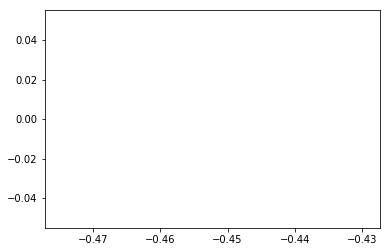

In [25]:
newOutputTable = pd.DataFrame({'Trial':[],'BPM':[],'GestureSize':[],'MedianVelocityRegionOne':[]})

In [54]:
for g in gestureSize:
    for b in bpm:
        for i in trials:
            sliceByTrial = data.loc[data.Trial == i]
            sliceByGesture = sliceByTrial.loc[sliceByTrial.GestureSize == g]
            sliceByBPM = sliceByGesture.loc[sliceByGesture.BPM == b]

            globalHighestPointIndex = sliceByBPM.Position_Y.idxmax()
            localHighestPointIndex = globalHighestPointIndex - sliceByBPM.index[0] + 1
            
            # Chunk of data before highest point
            regionOneData = sliceByBPM[0:localHighestPointIndex]
            
            indexOfLowestYPosition = regionOneData.Position_Y.idxmin()
            
            
            indexOfLastPosition = sliceByBPM.DistanceCoveredSoFar.idxmax()
            sliceByNegativeAngle = sliceByBPM.loc[sliceByBPM.AngleToBP1 == -999]
            
            Position_Y_AtBasePlane = sliceByBPM.Position_Y.loc[indexOfLowestYPosition]
            #print(sliceByBPM[sliceByNegativeAngle.Trial.size + sliceByBPM.index[0]])
            Position_Y_BeforeBasePlane = sliceByBPM.Position_Y.loc[indexOfLastPosition - 1]
            Position_Y_AfterBasePlane = sliceByBPM.Position_Y.loc[indexOfLastPosition]
            if(i == 1):
                print(sliceByBPM.Velocity_Y.loc[indexOfLowestYPosition + 1])
                
            
            

-0.24407960000000006
0.1350682
-0.5537463
-0.7402229
-0.2794863
0.03832117
0.04131711
-0.5491417
-0.5818706


In [8]:
newOutputTable

,Trial,BPM,GestureSize,MedianVelocityRegionOne


In [9]:
np.mean(newOutputTable[newOutputTable.GestureSize == "S"])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops.py:1164: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


TypeError: invalid type comparison

In [ ]:
np.mean(newOutputTable[newOutputTable.GestureSize == "M"])

In [ ]:
np.mean(newOutputTable[newOutputTable.GestureSize == "L"])

In [ ]:
newOutputTable.to_csv(r'MedianVelocityRegionOne.csv')